In [2]:
import os
for dirname, _, filenames in os.walk('./pokemon/images'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

./pokemon/images\images\abomasnow.png
./pokemon/images\images\abra.png
./pokemon/images\images\absol.png
./pokemon/images\images\accelgor.png
./pokemon/images\images\aegislash-blade.png
./pokemon/images\images\aerodactyl.png
./pokemon/images\images\aggron.png
./pokemon/images\images\aipom.png
./pokemon/images\images\alakazam.png
./pokemon/images\images\alomomola.png
./pokemon/images\images\altaria.png
./pokemon/images\images\amaura.png
./pokemon/images\images\ambipom.png
./pokemon/images\images\amoonguss.png
./pokemon/images\images\ampharos.png
./pokemon/images\images\anorith.png
./pokemon/images\images\araquanid.jpg
./pokemon/images\images\arbok.png
./pokemon/images\images\arcanine.png
./pokemon/images\images\arceus.png
./pokemon/images\images\archen.png
./pokemon/images\images\archeops.png
./pokemon/images\images\ariados.png
./pokemon/images\images\armaldo.png
./pokemon/images\images\aromatisse.png
./pokemon/images\images\aron.png
./pokemon/images\images\articuno.png
./pokemon/images

In [3]:
pip install pillow

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [5]:
from PIL import Image
ima1 = Image.open('./pokemon/images/images/abra.png')

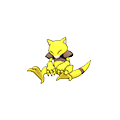

In [7]:
ima1


In [8]:
print(ima1.format)
print(ima1.size)
print(ima1.mode)

PNG
(120, 120)
RGBA


In [3]:
from numpy import asarray

npdata = asarray(ima1)
print(type(npdata))
print(npdata)

NameError: name 'ima1' is not defined

In [10]:
print(npdata.shape)

(120, 120, 4)


### 여기서 부터

In [4]:
import os
import cv2
import glob
import numpy as np
from pathlib import Path

img_dir = "./pokemon/images/images" # Dossier des images
dim = 224 # 이미지 크기 지정
X = [] # 이미지 데이터 리스트
y = [] # 포켓몬 이름 리스트
data_path = os.path.join(img_dir,'*g')
files = glob.glob(data_path) # data_path에 해당한는 파일 목록을 가져옴
n=0
for f1 in files:
    try:
        n=n+1
        img = cv2.imread(f1) # 이미지 파일을 읽어드림
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB) # 이미지를 rgb값으로 변환(혹 rgb값이 아닌것이 있을까봐)
        img = cv2.resize(img, (dim,dim)) # 이미지 크기를 원하는 사이즈로 변경
        X.append(np.array(img)) # 이미지를 배열로 변환
        y.append(Path(f1).stem) # 이미지 파일 이름을 추가
    except :
        continue
print(n,' images lues')

X = np.array(X)
y = np.array(y)

809  images lues


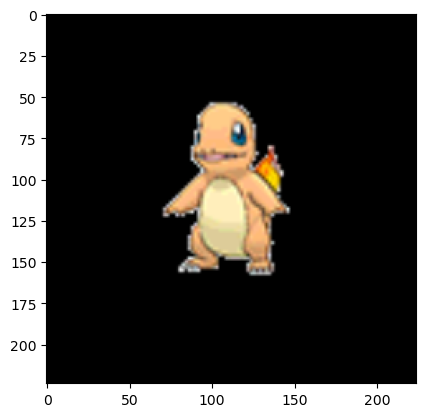

In [5]:
import matplotlib.pyplot as plt
plt.imshow(X[95])

In [4]:
X

array([[[[0, 0, 0],
         [0, 0, 0],
         [0, 0, 0],
         ...,
         [0, 0, 0],
         [0, 0, 0],
         [0, 0, 0]],

        [[0, 0, 0],
         [0, 0, 0],
         [0, 0, 0],
         ...,
         [0, 0, 0],
         [0, 0, 0],
         [0, 0, 0]],

        [[0, 0, 0],
         [0, 0, 0],
         [0, 0, 0],
         ...,
         [0, 0, 0],
         [0, 0, 0],
         [0, 0, 0]],

        ...,

        [[0, 0, 0],
         [0, 0, 0],
         [0, 0, 0],
         ...,
         [0, 0, 0],
         [0, 0, 0],
         [0, 0, 0]],

        [[0, 0, 0],
         [0, 0, 0],
         [0, 0, 0],
         ...,
         [0, 0, 0],
         [0, 0, 0],
         [0, 0, 0]],

        [[0, 0, 0],
         [0, 0, 0],
         [0, 0, 0],
         ...,
         [0, 0, 0],
         [0, 0, 0],
         [0, 0, 0]]],


       [[[0, 0, 0],
         [0, 0, 0],
         [0, 0, 0],
         ...,
         [0, 0, 0],
         [0, 0, 0],
         [0, 0, 0]],

        [[0, 0, 0],
         [0,

In [5]:
y

array(['abomasnow', 'abra', 'absol', 'accelgor', 'aegislash-blade',
       'aerodactyl', 'aggron', 'aipom', 'alakazam', 'alomomola',
       'altaria', 'amaura', 'ambipom', 'amoonguss', 'ampharos', 'anorith',
       'araquanid', 'arbok', 'arcanine', 'arceus', 'archen', 'archeops',
       'ariados', 'armaldo', 'aromatisse', 'aron', 'articuno', 'audino',
       'aurorus', 'avalugg', 'axew', 'azelf', 'azumarill', 'azurill',
       'bagon', 'baltoy', 'banette', 'barbaracle', 'barboach',
       'basculin-red-striped', 'bastiodon', 'bayleef', 'beartic',
       'beautifly', 'beedrill', 'beheeyem', 'beldum', 'bellossom',
       'bellsprout', 'bergmite', 'bewear', 'bibarel', 'bidoof', 'binacle',
       'bisharp', 'blacephalon', 'blastoise', 'blaziken', 'blissey',
       'blitzle', 'boldore', 'bonsly', 'bouffalant', 'bounsweet',
       'braixen', 'braviary', 'breloom', 'brionne', 'bronzong', 'bronzor',
       'bruxish', 'budew', 'buizel', 'bulbasaur', 'buneary', 'bunnelby',
       'burmy', 'butte

In [6]:
from tensorflow.keras.applications import vgg16, resnet50
from tensorflow.keras.models import Model

In [7]:
from PIL import Image
model = vgg16
base_model = model.VGG16(weights="imagenet")


In [8]:
base_model

In [9]:
vgg16_model = Model(inputs=base_model.input, outputs=base_model.get_layer("fc1").output )

In [10]:
X_vgg = vgg16_model.predict(X)

26/26 [==============================] - 33s 1s/step


In [67]:
type(X_vgg)

numpy.ndarray

In [12]:
len(y)

809

In [13]:
len(X_vgg[0])

4096

In [14]:
X_vgg

array([[ 3.719758  ,  5.122578  ,  0.        , ...,  0.        ,
         0.        ,  3.2651772 ],
       [ 0.        ,  9.435167  ,  3.9065914 , ...,  0.        ,
        11.21597   ,  0.        ],
       [ 0.        ,  0.        ,  0.        , ...,  0.        ,
        18.614082  ,  0.        ],
       ...,
       [ 0.        ,  6.2208247 ,  0.        , ...,  0.15688343,
         0.        ,  0.        ],
       [ 0.        ,  4.468933  ,  4.395493  , ...,  0.        ,
        10.495724  ,  0.        ],
       [ 0.5244373 , 12.827636  ,  1.8420314 , ...,  0.        ,
        13.297705  ,  0.        ]], dtype=float32)

In [7]:
import pandas as pd
df_x_vgg = pd.DataFrame(X_vgg)

NameError: name 'X_vgg' is not defined

In [49]:
df_x_vgg

,0,1,2,3,4,5,6,7,8,9,...,4086,4087,4088,4089,4090,4091,4092,4093,4094,4095
0,3.719758,5.122578,0.000000,16.017704,0.000000,0.000000,5.793159,0.000000,0.0,10.231280,...,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.000000,3.265177
1,0.000000,9.435167,3.906591,7.327384,0.000000,0.000000,11.855214,0.000000,0.0,1.348272,...,0.000000,0.0,0.000000,0.0,2.695930,0.0,0.0,0.000000,11.215970,0.000000
2,0.000000,0.000000,0.000000,4.171379,5.256935,0.000000,8.840150,1.232216,0.0,4.120341,...,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.0,0.000000,18.614082,0.000000
3,0.000000,4.124726,0.000000,1.809530,2.807141,0.000000,4.771886,0.000000,0.0,5.123504,...,2.066283,0.0,0.000000,0.0,0.000000,0.0,0.0,0.000000,5.236217,0.000000
4,0.000000,0.000000,0.000000,0.000000,11.272126,0.000000,0.000000,0.000000,0.0,1.397584,...,0.169720,0.0,0.000000,0.0,0.217870,0.0,0.0,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
804,6.470899,12.970052,6.463974,1.316538,0.000000,7.748288,12.679453,0.000000,0.0,0.000000,...,3.295303,0.0,0.020808,0.0,1.125216,0.0,0.0,0.000000,0.250173,0.000000
805,9.585179,10.906842,0.000000,3.265886,2.308676,9.001143,3.481818,0.000000,0.0,5.816721,...,6.257924,0.0,0.000000,0.0,1.277650,0.0,0.0,2.746523,6.779001,0.000000
806,0.000000,6.220825,0.000000,0.000000,0.000000,2.696662,0.972945,0.000000,0.0,2.396269,...,10.486498,0.0,0.000000,0.0,0.790545,0.0,0.0,0.156883,0.000000,0.000000
807,0.000000,4.468933,4.395493,4.378758,0.000000,0.000000,4.155922,0.000000,0.0,6.487426,...,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.0,0.000000,10.495724,0.000000


In [50]:
df_x_vgg.index=y

In [51]:
df_x_vgg.index.name = "name"

In [65]:
df_x_vgg

,0,1,2,3,4,5,6,7,8,9,...,4086,4087,4088,4089,4090,4091,4092,4093,4094,4095
name,,,,,,,,,,,,,,,,,,,,,
abomasnow,3.719758,5.122578,0.000000,16.017704,0.000000,0.000000,5.793159,0.000000,0.0,10.231280,...,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.000000,3.265177
abra,0.000000,9.435167,3.906591,7.327384,0.000000,0.000000,11.855214,0.000000,0.0,1.348272,...,0.000000,0.0,0.000000,0.0,2.695930,0.0,0.0,0.000000,11.215970,0.000000
absol,0.000000,0.000000,0.000000,4.171379,5.256935,0.000000,8.840150,1.232216,0.0,4.120341,...,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.0,0.000000,18.614082,0.000000
accelgor,0.000000,4.124726,0.000000,1.809530,2.807141,0.000000,4.771886,0.000000,0.0,5.123504,...,2.066283,0.0,0.000000,0.0,0.000000,0.0,0.0,0.000000,5.236217,0.000000
aegislash-blade,0.000000,0.000000,0.000000,0.000000,11.272126,0.000000,0.000000,0.000000,0.0,1.397584,...,0.169720,0.0,0.000000,0.0,0.217870,0.0,0.0,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
zoroark,6.470899,12.970052,6.463974,1.316538,0.000000,7.748288,12.679453,0.000000,0.0,0.000000,...,3.295303,0.0,0.020808,0.0,1.125216,0.0,0.0,0.000000,0.250173,0.000000
zorua,9.585179,10.906842,0.000000,3.265886,2.308676,9.001143,3.481818,0.000000,0.0,5.816721,...,6.257924,0.0,0.000000,0.0,1.277650,0.0,0.0,2.746523,6.779001,0.000000
zubat,0.000000,6.220825,0.000000,0.000000,0.000000,2.696662,0.972945,0.000000,0.0,2.396269,...,10.486498,0.0,0.000000,0.0,0.790545,0.0,0.0,0.156883,0.000000,0.000000


In [8]:
from sklearn.metrics.pairwise import cosine_similarity # 코사인 유사도
# similarities = cosine_similarity(df_x_vgg)
user_based_collabor = cosine_similarity(df_x_vgg)


NameError: name 'df_x_vgg' is not defined

In [54]:
user_based_collabor

array([[1.        , 0.43963176, 0.3728435 , ..., 0.5422248 , 0.52866256,
        0.45592028],
       [0.43963176, 1.        , 0.3938971 , ..., 0.672344  , 0.69343513,
        0.7039333 ],
       [0.3728435 , 0.3938971 , 0.9999999 , ..., 0.41241884, 0.4918839 ,
        0.30639514],
       ...,
       [0.5422248 , 0.672344  , 0.41241884, ..., 0.99999994, 0.7063721 ,
        0.6573798 ],
       [0.52866256, 0.69343513, 0.4918839 , ..., 0.7063721 , 1.0000001 ,
        0.6485263 ],
       [0.45592028, 0.7039333 , 0.30639514, ..., 0.6573798 , 0.6485263 ,
        1.0000002 ]], dtype=float32)

In [55]:
user_based_collabor = pd.DataFrame(user_based_collabor, index=df_x_vgg.index, columns=df_x_vgg.index)

In [56]:
user_based_collabor

name,abomasnow,abra,absol,accelgor,aegislash-blade,aerodactyl,aggron,aipom,alakazam,alomomola,...,zapdos,zebstrika,zekrom,zeraora,zigzagoon,zoroark,zorua,zubat,zweilous,zygarde-50
name,,,,,,,,,,,,,,,,,,,,,
abomasnow,1.000000,0.439632,0.372844,0.486979,0.444853,0.517085,0.587264,0.461991,0.418487,0.452967,...,0.463225,0.506496,0.468338,0.296210,0.507447,0.499521,0.484341,0.542225,0.528663,0.455920
abra,0.439632,1.000000,0.393897,0.519915,0.555902,0.589002,0.454488,0.660343,0.739431,0.461163,...,0.677193,0.651280,0.500085,0.445673,0.588163,0.634690,0.665767,0.672344,0.693435,0.703933
absol,0.372844,0.393897,1.000000,0.455524,0.442883,0.515752,0.476895,0.343547,0.321981,0.426468,...,0.395398,0.424958,0.424877,0.264827,0.433904,0.355399,0.380548,0.412419,0.491884,0.306395
accelgor,0.486979,0.519915,0.455524,1.000000,0.503233,0.578569,0.494490,0.585029,0.403639,0.596320,...,0.481254,0.569403,0.471845,0.355745,0.562664,0.561279,0.661079,0.588646,0.609462,0.546328
aegislash-blade,0.444853,0.555902,0.442883,0.503233,1.000000,0.584678,0.506555,0.553911,0.504511,0.506839,...,0.530938,0.558379,0.602633,0.255671,0.577674,0.524008,0.537198,0.566564,0.571597,0.546882
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
zoroark,0.499521,0.634690,0.355399,0.561279,0.524008,0.544508,0.537473,0.685715,0.649306,0.523474,...,0.540650,0.539126,0.533797,0.415232,0.580101,1.000000,0.757494,0.628985,0.645594,0.728971
zorua,0.484341,0.665767,0.380548,0.661079,0.537198,0.534302,0.522394,0.793655,0.586113,0.682226,...,0.514688,0.592026,0.452802,0.428897,0.692826,0.757494,1.000000,0.720098,0.633672,0.712351
zubat,0.542225,0.672344,0.412419,0.588646,0.566564,0.611324,0.547063,0.681304,0.564780,0.560742,...,0.640513,0.593531,0.548165,0.385578,0.715107,0.628985,0.720098,1.000000,0.706372,0.657380


In [57]:
df_x_vgg.index

Index(['abomasnow', 'abra', 'absol', 'accelgor', 'aegislash-blade',
       'aerodactyl', 'aggron', 'aipom', 'alakazam', 'alomomola',
       ...
       'zapdos', 'zebstrika', 'zekrom', 'zeraora', 'zigzagoon', 'zoroark',
       'zorua', 'zubat', 'zweilous', 'zygarde-50'],
      dtype='object', name='name', length=809)

In [58]:
user_based_collabor

name,abomasnow,abra,absol,accelgor,aegislash-blade,aerodactyl,aggron,aipom,alakazam,alomomola,...,zapdos,zebstrika,zekrom,zeraora,zigzagoon,zoroark,zorua,zubat,zweilous,zygarde-50
name,,,,,,,,,,,,,,,,,,,,,
abomasnow,1.000000,0.439632,0.372844,0.486979,0.444853,0.517085,0.587264,0.461991,0.418487,0.452967,...,0.463225,0.506496,0.468338,0.296210,0.507447,0.499521,0.484341,0.542225,0.528663,0.455920
abra,0.439632,1.000000,0.393897,0.519915,0.555902,0.589002,0.454488,0.660343,0.739431,0.461163,...,0.677193,0.651280,0.500085,0.445673,0.588163,0.634690,0.665767,0.672344,0.693435,0.703933
absol,0.372844,0.393897,1.000000,0.455524,0.442883,0.515752,0.476895,0.343547,0.321981,0.426468,...,0.395398,0.424958,0.424877,0.264827,0.433904,0.355399,0.380548,0.412419,0.491884,0.306395
accelgor,0.486979,0.519915,0.455524,1.000000,0.503233,0.578569,0.494490,0.585029,0.403639,0.596320,...,0.481254,0.569403,0.471845,0.355745,0.562664,0.561279,0.661079,0.588646,0.609462,0.546328
aegislash-blade,0.444853,0.555902,0.442883,0.503233,1.000000,0.584678,0.506555,0.553911,0.504511,0.506839,...,0.530938,0.558379,0.602633,0.255671,0.577674,0.524008,0.537198,0.566564,0.571597,0.546882
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
zoroark,0.499521,0.634690,0.355399,0.561279,0.524008,0.544508,0.537473,0.685715,0.649306,0.523474,...,0.540650,0.539126,0.533797,0.415232,0.580101,1.000000,0.757494,0.628985,0.645594,0.728971
zorua,0.484341,0.665767,0.380548,0.661079,0.537198,0.534302,0.522394,0.793655,0.586113,0.682226,...,0.514688,0.592026,0.452802,0.428897,0.692826,0.757494,1.000000,0.720098,0.633672,0.712351
zubat,0.542225,0.672344,0.412419,0.588646,0.566564,0.611324,0.547063,0.681304,0.564780,0.560742,...,0.640513,0.593531,0.548165,0.385578,0.715107,0.628985,0.720098,1.000000,0.706372,0.657380


In [59]:
def get_similar_user(name):
    
  sim_df = pd.DataFrame(user_based_collabor[name].sort_values(ascending=False).reset_index())
  sim_df.columns = ['name', 'similarity']
  sim_df = sim_df[sim_df['name'] != name][:20]

  print("=========== ", name, "과 비슷한 유형인 포켓몬 TOP 10 ===========")

  for i in range(len(sim_df)):
    prob_id = sim_df['name'].iloc[i]
    print("TOP ",i+1, "(",sim_df['similarity'].iloc[i].round(3),") : ", prob_id)

In [60]:
get_similar_user('absol')

===========  absol 과 비슷한 유형인 포켓몬 TOP 10 ===========
TOP  1 ( 0.554 ) :  suicune
TOP  2 ( 0.554 ) :  dewgong
TOP  3 ( 0.551 ) :  wynaut
TOP  4 ( 0.547 ) :  mewtwo
TOP  5 ( 0.546 ) :  furfrou
TOP  6 ( 0.54 ) :  persian
TOP  7 ( 0.527 ) :  pancham
TOP  8 ( 0.525 ) :  reshiram
TOP  9 ( 0.517 ) :  golduck
TOP  10 ( 0.517 ) :  cubchoo
TOP  11 ( 0.516 ) :  aerodactyl
TOP  12 ( 0.515 ) :  pinsir
TOP  13 ( 0.514 ) :  beartic
TOP  14 ( 0.512 ) :  togetic
TOP  15 ( 0.512 ) :  typhlosion
TOP  16 ( 0.509 ) :  tauros
TOP  17 ( 0.506 ) :  dratini
TOP  18 ( 0.506 ) :  pidgeot
TOP  19 ( 0.503 ) :  glameow
TOP  20 ( 0.502 ) :  wartortle


In [61]:
prob_list = user_based_collabor.index.tolist()

for prob in prob_list:
  get_similar_user(prob)

===========  abomasnow 과 비슷한 유형인 포켓몬 TOP 10 ===========
TOP  1 ( 0.692 ) :  excadrill
TOP  2 ( 0.64 ) :  camerupt
TOP  3 ( 0.638 ) :  blissey
TOP  4 ( 0.624 ) :  granbull
TOP  5 ( 0.614 ) :  cacturne
TOP  6 ( 0.606 ) :  torterra
TOP  7 ( 0.605 ) :  stunky
TOP  8 ( 0.599 ) :  slaking
TOP  9 ( 0.595 ) :  relicanth
TOP  10 ( 0.591 ) :  walrein
TOP  11 ( 0.589 ) :  krokorok
TOP  12 ( 0.588 ) :  slowbro
TOP  13 ( 0.587 ) :  aggron
TOP  14 ( 0.586 ) :  grotle
TOP  15 ( 0.586 ) :  krookodile
TOP  16 ( 0.586 ) :  shiftry
TOP  17 ( 0.585 ) :  volcarona
TOP  18 ( 0.585 ) :  typhlosion
TOP  19 ( 0.584 ) :  cherrim
TOP  20 ( 0.583 ) :  shroomish
===========  abra 과 비슷한 유형인 포켓몬 TOP 10 ===========
TOP  1 ( 0.795 ) :  kadabra
TOP  2 ( 0.767 ) :  poochyena
TOP  3 ( 0.766 ) :  corphish
TOP  4 ( 0.761 ) :  pumpkaboo-average
TOP  5 ( 0.759 ) :  caterpie
TOP  6 ( 0.759 ) :  wurmple
TOP  7 ( 0.756 ) :  hypno
TOP  8 ( 0.751 ) :  archen
TOP  9 ( 0.751 ) :  finneon
TOP  10 ( 0.75 ) :  corsola
TOP  11 ( 0.75 )

In [ ]:

plt.imshow(X[95])

In [9]:
X_vgg = np.load(f"./predict_data/test_array.npy")

In [10]:
X_vgg

array([[ 3.719758  ,  5.122578  ,  0.        , ...,  0.        ,
         0.        ,  3.2651772 ],
       [ 0.        ,  9.435167  ,  3.9065914 , ...,  0.        ,
        11.21597   ,  0.        ],
       [ 0.        ,  0.        ,  0.        , ...,  0.        ,
        18.614082  ,  0.        ],
       ...,
       [ 0.        ,  6.2208247 ,  0.        , ...,  0.15688343,
         0.        ,  0.        ],
       [ 0.        ,  4.468933  ,  4.395493  , ...,  0.        ,
        10.495724  ,  0.        ],
       [ 0.5244373 , 12.827636  ,  1.8420314 , ...,  0.        ,
        13.297705  ,  0.        ]], dtype=float32)

In [11]:
features = X_vgg

In [12]:
axes=[]
fig=plt.figure(figsize=(8,8))


<Figure size 800x800 with 0 Axes>

In [ ]:
for a in range(5*6):
    score = scores[a]
    axes.append(fig.add_subplot(5, 6, a+1))
    subplot_title=str(round(score[0],2)) + "/<" + str(score[2]+1) + ">"
    axes[-1].set_title(subplot_title)  
    plt.axis('off')
    plt.imshow(Image.open(score[1]))
fig.tight_layout()
plt.show()

AttributeError: 'Axes' object has no attribute 'add_subplot'

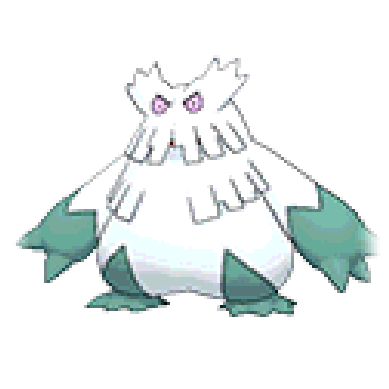

In [17]:
image_directory = "./pokemon/images/images"  # 이미지 파일이 있는 디렉토리 설정
image_extension = ".png"  # 이미지 파일 확장자 설정

axes = []  # Axes 객체를 저장할 리스트
a = 0
for filename in os.listdir(image_directory):
    if filename.endswith(image_extension):
        a +=1
        image_path = os.path.join(image_directory, filename)
        image = plt.imread(image_path)
        ax = plt.subplot()  # 새로운 Axes 객체 생성
        ax.imshow(image)  # 이미지를 Axes에 표시
        ax.axis('off')  # 축 숨기기
        axes.append(ax.add_subplot(5, 6, a+1))

# 모든 이미지를 한 화면에서 보여주기
plt.show(axes)

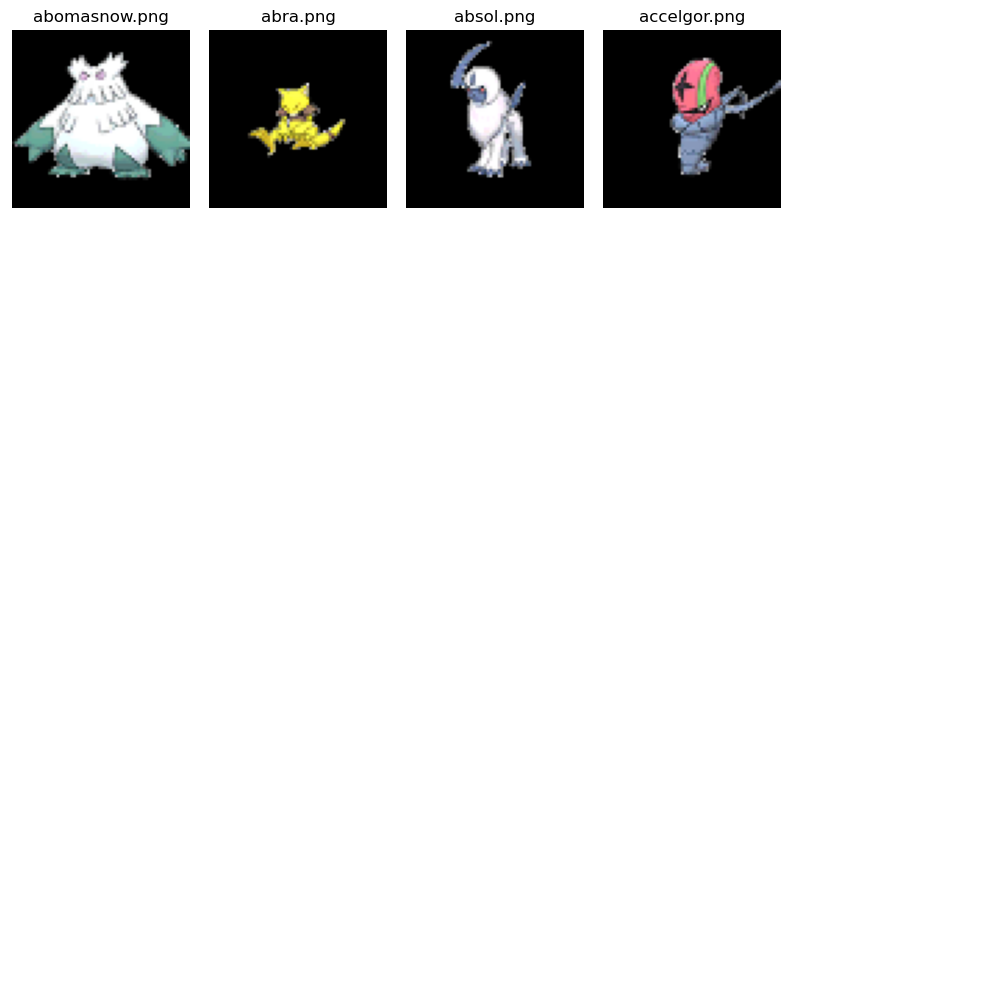

In [18]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt

# 이미지 파일 이름이 적힌 리스트
image_names = ["abomasnow.png", "abra.png", "absol.png", "accelgor.png"]

# 이미지 디렉토리 경로
img_dir = "./pokemon/images/images"

# 이미지 크기 설정
image_size = (64, 64)

# 이미지와 이미지 명을 저장할 리스트
X = []  # 이미지 데이터 리스트
y = []  # 포켓몬 이름 리스트

# 이미지 파일 경로 얻기 함수
def get_image_path(image_name, img_dir):
    return os.path.join(img_dir, image_name)

# 이미지 파일 및 이미지 명 가져오기
for image_name in image_names:
    image_path = get_image_path(image_name, img_dir)
    
    if os.path.exists(image_path):
        img = cv2.imread(image_path)
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        img = cv2.resize(img, image_size)
        
        X.append(np.array(img))
        y.append(image_name)
    else:
        print(f"이미지를 찾을 수 없습니다: {image_name}")

X = np.array(X)
y = np.array(y)

# 5x5 그리드로 이미지 표시
fig, axes = plt.subplots(5, 5, figsize=(10, 10))
for i in range(5):
    for j in range(5):
        index = i * 5 + j
        if index < len(X):
            axes[i, j].imshow(X[index])
            axes[i, j].set_title(y[index])
            axes[i, j].axis('off')
        else:
            axes[i, j].axis('off')
plt.tight_layout()
plt.show()

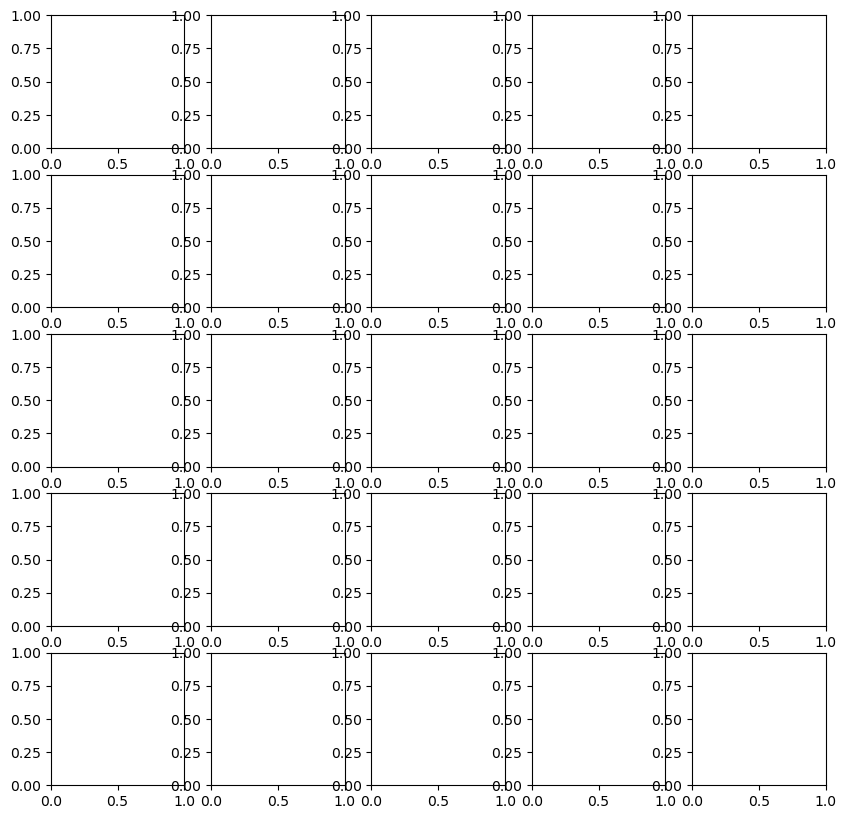

In [19]:
fig, axes = plt.subplots(5, 5, figsize=(10, 10))

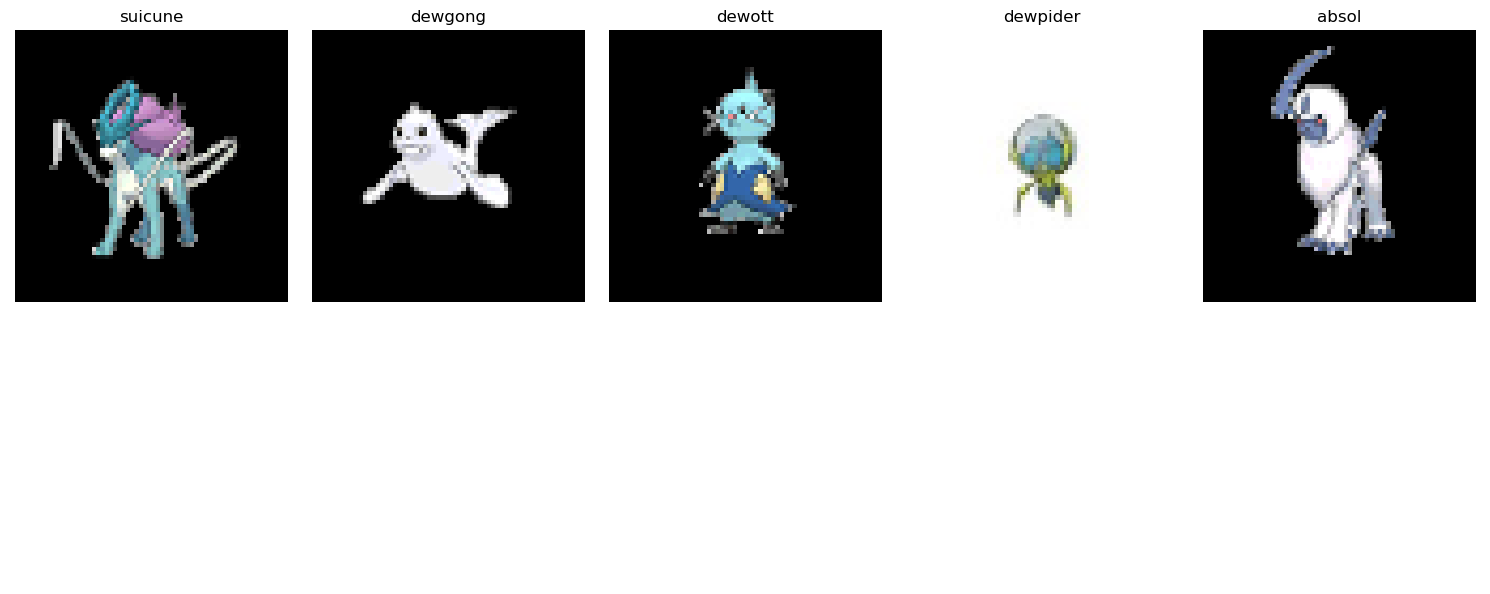

In [57]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt

# 이미지 디렉토리 경로
img_dir = "./pokemon/images/images"

X = []  # 이미지 데이터 리스트
y = []  # 포켓몬 이름 리스트

data_path = os.path.join(img_dir, '*g')
files = glob.glob(data_path)

for f1 in files:
    try:
        img = cv2.imread(f1)
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        img = cv2.resize(img, (64, 64))

        X.append(np.array(img))
        y.append(os.path.basename(f1).split('.')[0])  # 이미지 파일 이름에서 확장자 제거

    except:
        continue

X = np.array(X)
y = np.array(y)

# 'suicune'와 'dewgong' 이미지 필터링
selected_classes = ['suicune', 'dewgong', 'dewott','dewpider','absol']
selected_images = []


for target_class in selected_classes:
    for i, label in enumerate(y):
        if label == target_class:
            selected_images.append(X[i])
        
    

selected_images = np.array(selected_images)

# 5x2 그리드로 이미지 표시
fig, axes = plt.subplots(2, 5, figsize=(15, 6))



for i in range(2):
    for j in range(5):
        index = i * 5 + j
        if index < len(selected_images):
            axes[i, j].imshow(selected_images[index])
            axes[i, j].set_title(selected_classes[index])
            axes[i, j].axis('off')
        else:
            axes[i, j].axis('off')
plt.tight_layout()
plt.show()

C:\Users\user\AppData\Local\Temp\ipykernel_20784\325806495.py:69: UserWarning: Glyph 48708 (\N{HANGUL SYLLABLE BI}) missing from current font.
  plt.tight_layout()
C:\Users\user\AppData\Local\Temp\ipykernel_20784\325806495.py:69: UserWarning: Glyph 44368 (\N{HANGUL SYLLABLE GYO}) missing from current font.
  plt.tight_layout()
C:\Users\user\AppData\Local\Temp\ipykernel_20784\325806495.py:69: UserWarning: Glyph 54616 (\N{HANGUL SYLLABLE HA}) missing from current font.
  plt.tight_layout()
C:\Users\user\AppData\Local\Temp\ipykernel_20784\325806495.py:69: UserWarning: Glyph 44256 (\N{HANGUL SYLLABLE GO}) missing from current font.
  plt.tight_layout()
C:\Users\user\AppData\Local\Temp\ipykernel_20784\325806495.py:69: UserWarning: Glyph 51088 (\N{HANGUL SYLLABLE JA}) missing from current font.
  plt.tight_layout()
C:\Users\user\AppData\Local\Temp\ipykernel_20784\325806495.py:69: UserWarning: Glyph 45716 (\N{HANGUL SYLLABLE NEUN}) missing from current font.
  plt.tight_layout()
C:\Users\user

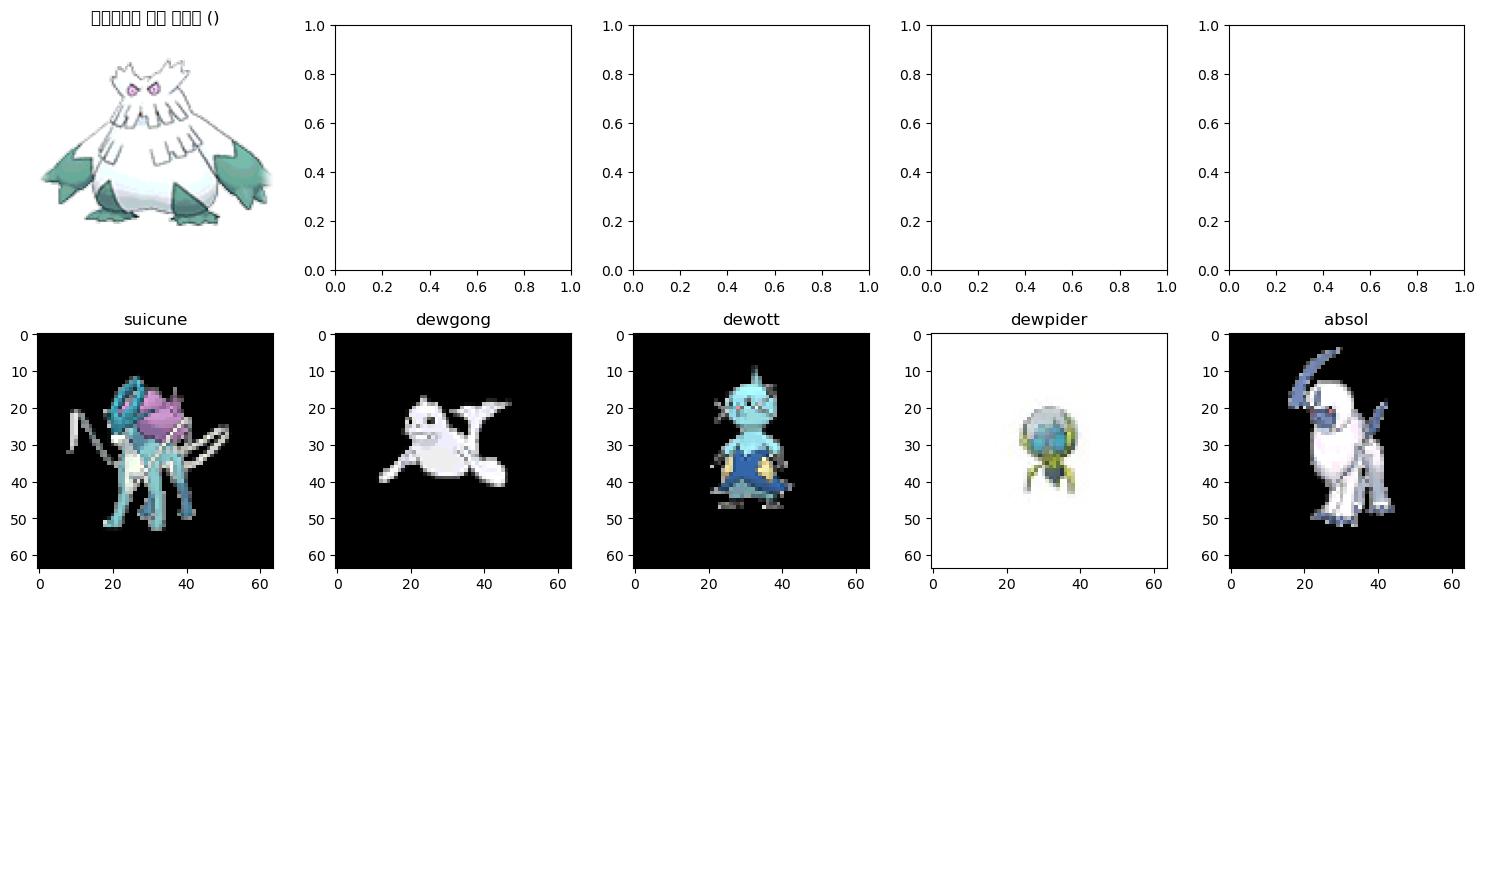

In [67]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image  # 이미지 삽입을 위한 PIL 라이브러리 추가

# 삽입할 이미지 파일 경로
top_image_path = "./pokemon/images/images/abomasnow.png"

# 삽입할 이미지를 subplot 위에 표시
top_image = Image.open(top_image_path)

# 이미지 디렉토리 경로
img_dir = "./pokemon/images/images"

X = []  # 이미지 데이터 리스트
y = []  # 포켓몬 이름 리스트

data_path = os.path.join(img_dir, '*g')
files = glob.glob(data_path)

for f1 in files:
    try:
        img = cv2.imread(f1)
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        img = cv2.resize(img, (64, 64))

        X.append(np.array(img))
        y.append(os.path.basename(f1).split('.')[0])  # 이미지 파일 이름에서 확장자 제거

    except:
        continue

X = np.array(X)
y = np.array(y)

# 'suicune'와 'dewgong' 이미지 필터링
selected_classes = ['suicune', 'dewgong', 'dewott', 'dewpider', 'absol']
selected_images = []

for target_class in selected_classes:
    for i, label in enumerate(y):
        if label == target_class:
            selected_images.append(X[i])

selected_images = np.array(selected_images)

# 이미지를 출력할 그림 생성
fig, axes = plt.subplots(3, 5, figsize=(15, 9))  # 3행 5열 그리드

# 첫 번째 행에 이미지 삽입
axes[0, 0].imshow(top_image)
axes[0,0].axis('off')
#axes[0, 0].set_title(f"name {name}")




# 나머지 코드는 이어서 진행
for i in range(2):
    for j in range(5):
        index = i * 5 + j
        if index < len(selected_images):
            axes[i + 1, j].imshow(selected_images[index])
            axes[i + 1, j].set_title(selected_classes[index])
        else:
            axes[i + 1, j].axis('off')  # 이미지가 없는 그리드에서 축과 눈금을 숨김

plt.tight_layout()
plt.show()

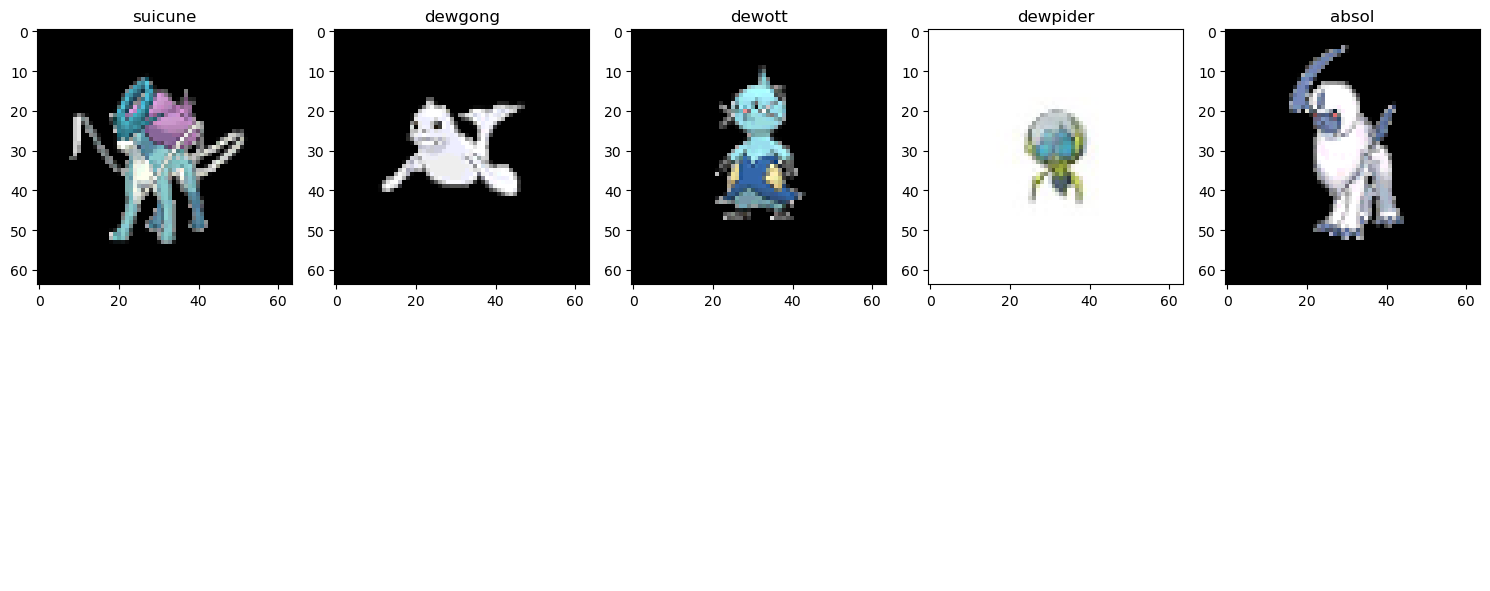

In [68]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image  # 이미지 삽입을 위한 PIL 라이브러리 추가

# 삽입할 이미지 파일 경로
top_image_path = "./pokemon/images/images/abomasnow.png"

# 삽입할 이미지를 subplot 위에 표시
top_image = Image.open(top_image_path)

# 이미지 디렉토리 경로
img_dir = "./pokemon/images/images"

X = []  # 이미지 데이터 리스트
y = []  # 포켓몬 이름 리스트

data_path = os.path.join(img_dir, '*g')
files = glob.glob(data_path)

for f1 in files:
    try:
        img = cv2.imread(f1)
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        img = cv2.resize(img, (64, 64))

        X.append(np.array(img))
        y.append(os.path.basename(f1).split('.')[0])  # 이미지 파일 이름에서 확장자 제거

    except:
        continue

X = np.array(X)
y = np.array(y)

# 'suicune'와 'dewgong' 이미지 필터링
selected_classes = ['suicune', 'dewgong', 'dewott', 'dewpider', 'absol']
selected_images = []

for target_class in selected_classes:
    for i, label in enumerate(y):
        if label == target_class:
            selected_images.append(X[i])

selected_images = np.array(selected_images)

# 이미지를 출력할 그림 생성
fig, axes = plt.subplots(2, 5, figsize=(15, 6))  # 2행 5열 그리드

# 나머지 코드는 이어서 진행
for i in range(2):
    for j in range(5):
        index = i * 5 + j
        if index < len(selected_images):
            axes[i, j].imshow(selected_images[index])
            axes[i, j].set_title(selected_classes[index])
        else:
            axes[i, j].axis('off')  # 이미지가 없는 그리드에서 축과 눈금을 숨김

plt.tight_layout()
plt.show()

In [26]:
y

array(['abomasnow', 'abra', 'absol', 'accelgor', 'aegislash-blade',
       'aerodactyl', 'aggron', 'aipom', 'alakazam', 'alomomola',
       'altaria', 'amaura', 'ambipom', 'amoonguss', 'ampharos', 'anorith',
       'araquanid', 'arbok', 'arcanine', 'arceus', 'archen', 'archeops',
       'ariados', 'armaldo', 'aromatisse', 'aron', 'articuno', 'audino',
       'aurorus', 'avalugg', 'axew', 'azelf', 'azumarill', 'azurill',
       'bagon', 'baltoy', 'banette', 'barbaracle', 'barboach',
       'basculin-red-striped', 'bastiodon', 'bayleef', 'beartic',
       'beautifly', 'beedrill', 'beheeyem', 'beldum', 'bellossom',
       'bellsprout', 'bergmite', 'bewear', 'bibarel', 'bidoof', 'binacle',
       'bisharp', 'blacephalon', 'blastoise', 'blaziken', 'blissey',
       'blitzle', 'boldore', 'bonsly', 'bouffalant', 'bounsweet',
       'braixen', 'braviary', 'breloom', 'brionne', 'bronzong', 'bronzor',
       'bruxish', 'budew', 'buizel', 'bulbasaur', 'buneary', 'bunnelby',
       'burmy', 'butte